# <center>Introduction on Using Python to access and analyse GeoNet's Tide Gauge Data

This tutorial demonstrates the retrieval of waveform data from tide gauges. By the end of this tutorial, the user will be able to check the available tide gauge data and generate a graph like the one below. <img src="tide.png">

## Table of Contents

### 1. Introduction
### 2. Set up
### 3. Get the Location of all  Stations with Tide Gauge
### 4. Look more at one Station
### 5. Get Waveform Data
#####  &nbsp; 5. 1 Getting Near real-time waveform data
### 6. Save Waveform Data

## 1. Introduction

This tutorial offers basic steps in accessing the data coming from the GeoNet network of water level sensors. 

To be able to run this tutorial, the user needs to install obspy (https://github.com/obspy/obspy/wiki) and basemap (https://matplotlib.org/basemap/) packages, using `pip install (package name)` in the terminal / command prompt

This tutorial assumes that the user have a basic knowledge of Python.

###### About Geonet tide gauge data

Geonet has 3 types of data from tide gauges.
<ul>
<li>Raw data from the pressure sensor
<li>Data corrected to height
<li>Data that has been de-tided 


There are two sampling rates available: 10 Hz and 1 Hz. The three-letter channel code is described herein.
All tide gauges are in the form (B/L)T(Z/H/T)
<ul>
<li>The first letter denotes the sampling rate, such that B = 10 Hz and L = 1 Hz, <br>
<li>The second letter denotes the instrument code. T stands for water level sensor<br> 
<li>The third letter refers to the type of data, e.g. Z = raw, H = corrected to height and T = de-tided data <br>

For a full list see https://www.geonet.org.nz/data/supplementary/channels 

## 2. Set Up

###### Import obspy

In [1]:
from obspy.clients.fdsn import Client as FDSNClient # Import a module to retrieve data from FDSN Web Services 
from obspy import UTCDateTime # Import a module to manage time series format and rename as UTCDateTime
from obspy import read_inventory # Imports module to read stattion data

For more information on obspy run `help(obspy)`

In [2]:
#import matplotlib
#matplotlib.use('TkAgg')

`matplotlib` is the package used to generate plots in Python. 
The line `matplotlib.use('TkAgg')` will make all plots open in an interactive window, known as a Tkinter window, so the user can zoom in on these plots and save them as a png. (The `Tk` is to make it in a Tkinter window and the `Agg` stands for the Anti-Grain Geometry rendering engine that is used to make high-quality images). 
These lines of code are used in Python version 2.0 to avoid plotting errors, but is not needed in Python 3.

###### Set up URL's

In [3]:
client = FDSNClient("GEONET")
clinet_nrt = FDSNClient('https://service-nrt.geonet.org.nz')

The available FDSN webservices for GeoNet are the following: <br>

- An archive webserver that contains verified data starting 7 days after collection; and
- A near real-time server for unverified data for the last 8 days

## 3. Get the Location of all  Stations with Tide Gauges

###### Set the start and end time of the data you want to select

In [4]:
starttime = UTCDateTime("2011-03-11T17:00:00.000") # initial time
endtime = UTCDateTime("2011-03-12T07:00:00.000") # end time 

Note that specified start and end times are in UTC (Universal Time Coordinated), which is 12 or 13 hours behind NZT (New Zealand Time, depending on daylight savings time). Also, GMT or Greenwich mean time is the same time as UTC.


In this example, we are looking at the 2011 Tōhoku earthquake and the tsunami which happened on the 11 March 2011 at 14:46 JST. If it affected New Zealand, it would have done so about 12 hours after the event happened. 

There are available time converters online (https://www.worldtimebuddy.com/).
The user can specify the time, by adding the number of seconds, e.g. `stattime + 60` would be the time 2011-03-11 17:01:00.000<br>

###### Get an inventory of tide gauge stations

In [5]:
Inventory = client.get_stations(starttime = starttime,endtime = endtime, channel="?T?" )

`get_stations` gets all tide stations that are operational, from `starttime` to `endtime`. Specify other station information in the `()`such as channel, station, latitude and longitude with a maxradius<br>

Note that all channels with a code in the form (B/L)T(Z/H/T) are tide gauges. <br>

Using '?' as wildcard will aid in looking for data with a channel code in the format (any letter)T(any letter). <br>
The above-code searches for all stations that have a channel code in the format (any letter)T(any letter). <br>

###### Plot all stations that have a tide gauge

In [ ]:
Inventory.plot(projection="local")

`projection="local"` makes a plot that is a map and has all the data points in it. More information can be found at https://matplotlib.org/basemap/

## 4. Look more at one Station

This section demonstrates how to get station information including the instrument response.

###### Get more data on the Raoul Island station

In [7]:
Raoul_Island = client.get_stations(starttime = starttime,endtime = endtime,station="RFRT", level="response" )

Having seen the Raoul Island station on the map and its station code, more info about this station can be queried. <br>
The parameter `level` is used to specify the "level" of detail for the data of interest. The `level="response"` is the  most complete "level" of data that can be received from `get_stations` and it includes the instrument response.<br>
`station="RFRT"` instructs the code to get data for the station with the station code RFRT<br>

###### Print Raoul Island station metadata

In [8]:
channels = Raoul_Island [0][0]
print(channels)

Station RFRT (Raoul Island Fishing Rock)
	Station Code: RFRT
	Channel Count: 16/16 (Selected/Total)
	2009-05-18T00:00:00.000000Z - 
	Access: open 
	Latitude: -29.25, Longitude: -177.90, Elevation: 2.0 m
	Available Channels:
		RFRT.40.BTZ, RFRT.40.BTH, RFRT.40.BTT, RFRT.40.LTZ, RFRT.40.LTH, 
		RFRT.40.LTT, RFRT.40.VTH, RFRT.40.VTT, RFRT.41.BTZ, RFRT.41.BTH, 
		RFRT.41.BTT, RFRT.41.LTZ, RFRT.41.LTH, RFRT.41.LTT, RFRT.41.VTH, 
		RFRT.41.VTT


Note all tide gauges are in the form (B/L)T(Z/H/T). The three-letter channel code refers to: 
<ul>
<li>The first letter denotes the sampling rate, such that B = 10 Hz and L = 1 Hz, <br>
<li>The second letter denotes the instrument code. T stands for water level sensor<br> 
<li>The third letter refers to the type of data, e.g. Z = raw, H = corrected to height and T = de-tided data <br>

</ul>

Also, `Raoul_Island [0][0]` means that information will be retrieved from the first station on the inventory.

###### Print Raoul Island Channel metadata including instrument response data for channels at 10Hz

In [9]:
for i in range (len(channels)): # make a lop over the channels data
        if i==1 or i==4 or i==7 : # only print the 3 channel we want to look more into
            print(channels[i])
            print(channels[i].response)
            print("")

Channel 'BTZ', Location '40' 
	Time range: 2011-11-09T00:00:00.000000Z - --
	Latitude: -29.25, Longitude: -177.90, Elevation: 2.0 m, Local Depth: 0.0 m
	Azimuth: 0.00 degrees from north, clockwise
	Dip: 0.00 degrees down from horizontal
	Channel types: CONTINUOUS, GEOPHYSICAL
	Sampling Rate: 10.00 Hz
	Sensor (Description): Pressure Sensor (Druck PTX)
	Response information available
Channel Response
	From m () to count ()
	Overall Sensitivity: 86402.7 defined at 1.000 Hz
	5 stages:
		Stage 1: PolynomialResponseStage from m to A, gain: 0.0008
		Stage 2: PolynomialResponseStage from A to V, gain: 250
		Stage 3: PolynomialResponseStage from V to V, gain: 1.03
		Stage 4: CoefficientsTypeResponseStage from V to count, gain: 419430
		Stage 5: FIRResponseStage from count to count, gain: 1

Channel 'BTT', Location '40' 
	Time range: 2011-11-09T00:00:00.000000Z - --
	Latitude: -29.25, Longitude: -177.90, Elevation: 2.0 m, Local Depth: 0.0 m
	Azimuth: 0.00 degrees from north, clockwise
	Dip: 0.00

Note that the printed channels have channel code in the form BT(Z/H/T). <br> 
This means that all these 3 channels are tide gauges, with sampling rate of 10Hz.<br>

## 5. Get Waveform Data

###### Get Waveform Data from 10Hz Channels

In [10]:
RFRT= client.get_waveforms('NZ',"RFRT", "40", "BT?", starttime,endtime)

The parameters are in the order network, station, location, channel, starttime, and endtime.
The ? is a wildcard character used as a single character. This example will get data with channel codes BTH, BTT and BTZ

###### Check basic metadata from miniSEED header

In [11]:
print(RFRT[0].stats)

               network: NZ
               station: RFRT
              location: 40
               channel: BTH
             starttime: 2011-03-11T16:59:54.269536Z
               endtime: 2011-03-12T07:00:16.369536Z
         sampling_rate: 10.0
                 delta: 0.1
                  npts: 504222
                 calib: 1.0
_fdsnws_dataselect_url: http://service.geonet.org.nz/fdsnws/dataselect/1/query
               _format: MSEED
                 mseed: AttribDict({'dataquality': 'D', 'number_of_records': 2331, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 3580416})


###### Plot this data

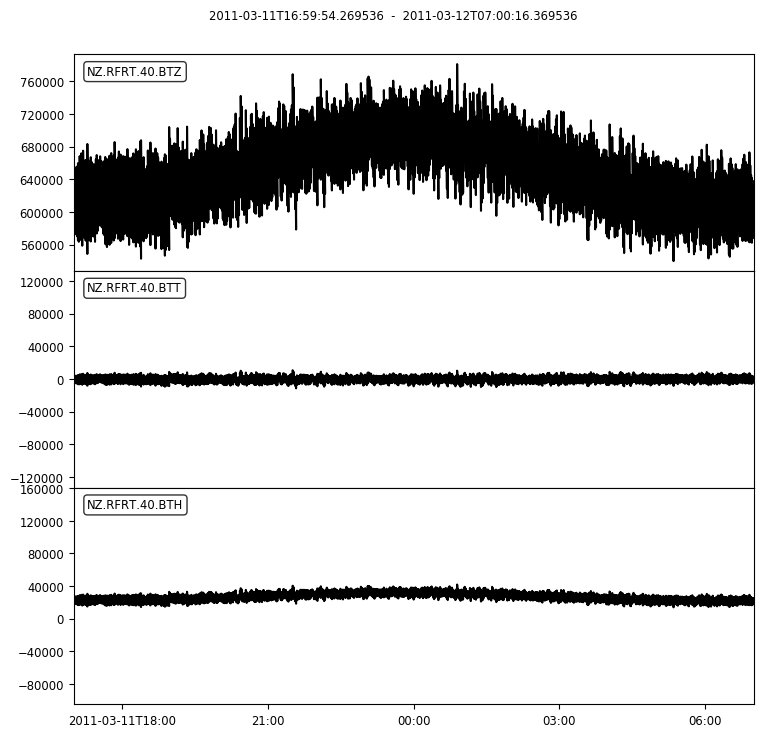

In [22]:
RFRT.plot()

The plots above depict different kinds of waveforms. This is because these plots depict the difference in the data type, e.g. Z = raw, H = corrected to height and T = de-tided data.<br>

###### Print what channels we have saved under RFRT

In [13]:
print(RFRT)

3 Trace(s) in Stream:
NZ.RFRT.40.BTH | 2011-03-11T16:59:54.269536Z - 2011-03-12T07:00:16.369536Z | 10.0 Hz, 504222 samples
NZ.RFRT.40.BTT | 2011-03-11T16:59:54.269536Z - 2011-03-12T07:00:16.369536Z | 10.0 Hz, 504222 samples
NZ.RFRT.40.BTZ | 2011-03-11T16:59:54.269536Z - 2011-03-12T07:00:16.369536Z | 10.0 Hz, 504222 samples


Data is in order BTH,BTT,BTZ so is in order data corrected to height, de-tided, then raw data.

###### Split the RFRT data up into its channels

In [14]:
corrected = RFRT[0]
detided = RFRT[1]
raw = RFRT[2]

## 5. 1 Getting Near real-time waveform data

###### Set new start and end time of the data you want to look at

In [15]:
t1 = UTCDateTime.now()-777600 #9 days ago
t2 = UTCDateTime.now()-518400 #6 days ago

Note that time is in UTC (Universal Time Coordinated).

`UTCDateTime.now()-777600` means the code considers the current time, convert it to UTC and then remove 777,600 seconds from it, which is $60$(minutes)$*60$(seconds)$*24$(hours)$*9$(days). 

###### Try both near real-time and  archive service to get waveform data

In [16]:
try:
    stnrt = clinet_nrt.get_waveforms('NZ',"RFRT", "40", "BTH", t1 , t2)#try near real-time
except:
    print('nrt client not successful')
    
try:
    starc = client.get_waveforms('NZ',"RFRT", "40", "BTH", t1 , t2)#try achive
except:
    print('arc client not successful')

Note that GeoNet is using two FDSN webservices: an archive webservice and a near real-time webservice. <br>

The time between 9 and 6 days overlaps. This code attempts to get the data from both services.<br>


###### Merge this data

In [17]:
st = stnrt #rename near real-time data 
st += starc #add archive data to this 
st.merge(fill_value = 'interpolate') #merge this data

1 Trace(s) in Stream:
NZ.RFRT.40.BTH | 2019-01-08T23:23:41.069500Z - 2019-01-11T23:23:54.869500Z | 10.0 Hz, 2592139 samples

If data is not merged, it will be difficult to plot and manage. 
`st += starc` is the same as `st = st + starc`. 
`fill_value = 'interpolate'` means if there is a missing value in the search, it will be filled with a "best guess" data point by looking at the two data points next to it. 

###### Plot this data

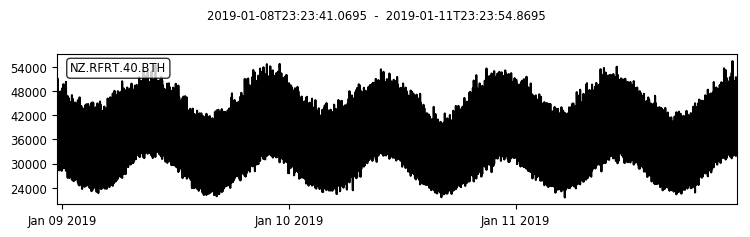

In [18]:
st.plot()

###### Trim this data

In [19]:
t = UTCDateTime.now()-604800 #7 days ago
st.trim(t,t+86400)

1 Trace(s) in Stream:
NZ.RFRT.40.BTH | 2019-01-10T23:23:50.669500Z - 2019-01-11T23:23:50.669500Z | 10.0 Hz, 864001 samples

`st.trim` is used to "zoom in" on part of the data that has been requested. <br>
In this example, the code is searching for data from 7 days ago up to 8 days after ($60$(minutes)$*60$(seconds)$*24$(hours)$*7$(days)$= 604800$ and $60$(minutes)$*60$(seconds)$*24$(hours)$= 86400$ or 1 day)


###### Plot the trimmed data

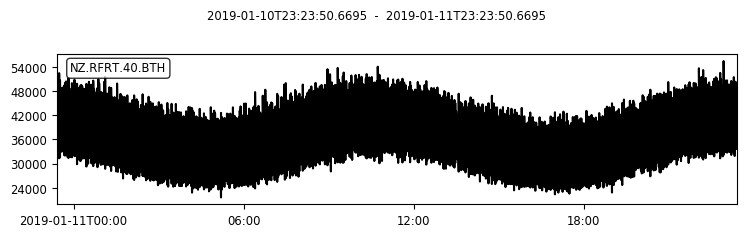

In [20]:
st.plot()

## 6. Save Waveform Data

###### Save this data

In [21]:
corrected.write('corrected.csv', format='TSPAIR')
detided.write('detided.csv', format='TSPAIR')
raw.write('raw.csv', format='TSPAIR')

Files are saved in the same folder where this tutorial notebook is saved. <br>
Files are saved in .csv format, making it easier to open in spreadsheet format using another .<br>
`format = 'TSPAIR'` makes the data into a two column list of time and the sample values <br>
For more information on this you can go to http://ds.iris.edu/ds/nodes/dmc/data/formats/simple-ascii/